In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [72]:
df = DataFrame()
df = pd.read_excel(r'/Users/yousefhammad/Desktop/endg 319/barcavsmadrid.xlsx')
df

,Win_Loss_Ratio,Goals_Scored,Goals_Against,Team
0,1.181818,62,47,Barca
1,2.250000,81,46,Barca
2,1.100000,45,36,Barca
3,2.714286,74,38,Barca
4,1.166667,59,41,Barca
...,...,...,...,...
117,9.666667,106,41,Madrid
118,3.666667,94,44,Madrid
119,1.750000,63,46,Madrid
120,8.666667,70,25,Madrid


# Task 1

In [73]:
dfX = df.drop (columns = ['Team'])
sy = df.Team
dfX

,Win_Loss_Ratio,Goals_Scored,Goals_Against
0,1.181818,62,47
1,2.250000,81,46
2,1.100000,45,36
3,2.714286,74,38
4,1.166667,59,41
...,...,...,...
117,9.666667,106,41
118,3.666667,94,44
119,1.750000,63,46
120,8.666667,70,25


In [74]:
from sklearn.model_selection import train_test_split #seperating into 2 sets -> test and train
dfX_train, dfX_test, sy_train, sy_test = train_test_split(dfX,sy,test_size = 0.25, random_state = 0)

In [75]:
dfX_train, dfX_test, sy_train, sy_test;

In [76]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le

LabelEncoder()

In [77]:
le = le.fit(sy_train)
le.classes_

array(['Barca', 'Madrid'], dtype=object)

In [78]:
y_train = le.transform(sy_train)
sy_train, y_train

(62     Madrid
 59      Barca
 43      Barca
 51      Barca
 3       Barca
         ...  
 67     Madrid
 64     Madrid
 117    Madrid
 47      Barca
 44      Barca
 Name: Team, Length: 91, dtype: object,
 array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 0]))

In [79]:
dfX_train.to_numpy()

array([[  3.16666667,  58.        ,  24.        ],
       [  4.16666667,  86.        ,  38.        ],
       [  2.625     ,  63.        ,  39.        ],
       [  9.33333333, 114.        ,  29.        ],
       [  2.71428571,  74.        ,  38.        ],
       [  1.18181818,  46.        ,  36.        ],
       [  2.5       ,  58.        ,  29.        ],
       [  3.125     ,  71.        ,  32.        ],
       [  5.4       , 105.        ,  35.        ],
       [  3.28571429,  78.        ,  32.        ],
       [  2.5       ,  70.        ,  40.        ],
       [ 15.        ,  95.        ,  21.        ],
       [  1.88888889,  63.        ,  45.        ],
       [  7.        , 110.        ,  34.        ],
       [  1.07142857,  49.        ,  44.        ],
       [  1.33333333,  69.        ,  37.        ],
       [  2.        ,  58.        ,  48.        ],
       [  2.125     ,  40.        ,  26.        ],
       [  5.75      ,  83.        ,  33.        ],
       [  1.58333333,  61.     

In [80]:
n1 = preprocessing.MinMaxScaler() #preprocessing attributes using MinMaxScaler()
n1 = n1.fit(dfX_train.to_numpy())
X_train = n1.transform (dfX_train.to_numpy())
X_train, X_train.shape

(array([[0.07222222, 0.23076923, 0.15384615],
        [0.10555556, 0.58974359, 0.51282051],
        [0.05416667, 0.29487179, 0.53846154],
        [0.27777778, 0.94871795, 0.28205128],
        [0.05714286, 0.43589744, 0.51282051],
        [0.00606061, 0.07692308, 0.46153846],
        [0.05      , 0.23076923, 0.28205128],
        [0.07083333, 0.3974359 , 0.35897436],
        [0.14666667, 0.83333333, 0.43589744],
        [0.07619048, 0.48717949, 0.35897436],
        [0.05      , 0.38461538, 0.56410256],
        [0.46666667, 0.70512821, 0.07692308],
        [0.02962963, 0.29487179, 0.69230769],
        [0.2       , 0.8974359 , 0.41025641],
        [0.00238095, 0.11538462, 0.66666667],
        [0.01111111, 0.37179487, 0.48717949],
        [0.03333333, 0.23076923, 0.76923077],
        [0.0375    , 0.        , 0.20512821],
        [0.15833333, 0.55128205, 0.38461538],
        [0.01944444, 0.26923077, 0.82051282],
        [0.07777778, 0.17948718, 0.20512821],
        [0.02222222, 0.29487179, 0

In [81]:
from sklearn.neighbors import KNeighborsClassifier #classifier model development 
knn = KNeighborsClassifier(n_neighbors=1)
knn=knn.fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=1)

In [82]:
y_test = le.transform(sy_test.to_numpy())
sy_test, y_test

(84     Madrid
 97     Madrid
 10      Barca
 71     Madrid
 8       Barca
 45      Barca
 22      Barca
 7       Barca
 61     Madrid
 90     Madrid
 86     Madrid
 109    Madrid
 33      Barca
 66     Madrid
 2       Barca
 78     Madrid
 99     Madrid
 24      Barca
 121    Madrid
 30      Barca
 95     Madrid
 101    Madrid
 60      Barca
 16      Barca
 96     Madrid
 112    Madrid
 13      Barca
 75     Madrid
 73     Madrid
 26      Barca
 56      Barca
 Name: Team, dtype: object,
 array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
        0, 0, 1, 1, 0, 1, 1, 0, 0]))

In [83]:
X_test = n1.transform(dfX_test.to_numpy())
dfX_test, X_test

(     Win_Loss_Ratio  Goals_Scored  Goals_Against
 84         3.142857            59             37
 97         6.750000            85             36
 10         3.166667            50             22
 71         2.833333            46             24
 8          1.857143            40             18
 45         4.166667            80             35
 22         2.428571            60             29
 7          2.500000            48             29
 61        12.000000            89             25
 90        13.000000           107             38
 86         6.500000            83             33
 109        2.500000            83             52
 33         3.571429            91             42
 66         3.166667            53             30
 2          1.100000            45             36
 78         2.444444            77             40
 99         1.750000            77             62
 24        10.500000            69             25
 121        6.250000            67             28


In [84]:
knn.predict(X_test)

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1])

In [85]:
y_test

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0])

In [86]:
knn.score(X_test,y_test)

0.45161290322580644

In [87]:
knn.score(X_train,y_train)

1.0

# Task 2a

In [88]:
k = 1         

value_of_k = []    
train = []
test = []


while k <= 91:    #while loop to to get the accuracy values 
    knn = KNeighborsClassifier(n_neighbors = k)
    knn = knn.fit(X_train, y_train)
    X_test = n1.transform(dfX_test.to_numpy())
    y_test = le.transform(sy_test.to_numpy())
    train.append(knn.score(X_train, y_train))
    test.append(knn.score(X_test, y_test))
    value_of_k.append(k)
    k = k+1

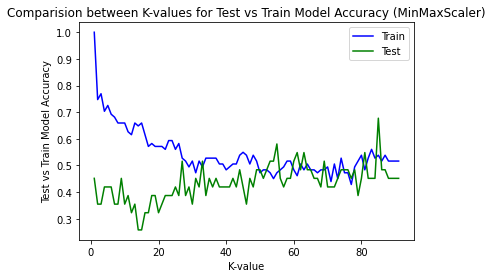

In [89]:
fig, ax = plt.subplots()   #plot for Test vs Train Model Accuracy using MinMaxScaler

k = np.array(value_of_k)
train = np.array(train)
test = np.array(test)

plt.plot(k, train, 'b', label='Train')
plt.plot(k, test, 'g', label='Test')

plt.title('Comparision between K-values for Test vs Train Model Accuracy (MinMaxScaler)')

plt.xlabel('K-value')
plt.ylabel('Test vs Train Model Accuracy')
plt.legend()


# Task 2b

In [90]:
n3 = preprocessing.StandardScaler() 
n3 = n3.fit(X_train)
X_standard_train = n3.transform (X_train)

In [91]:
standard_k = 1

value_of_k1 = []
train1 = []
test1 = []


while standard_k <= 91:     #while loop to to get the accuracy values 
    knn = KNeighborsClassifier(n_neighbors = standard_k)
    knn = knn.fit(X_standard_train, y_train)
    X_test = n1.transform(dfX_test.to_numpy())
    y_test = le.transform(sy_test.to_numpy())
    train1.append(knn.score(X_standard_train, y_train))
    test1.append(knn.score(X_test, y_test))
    value_of_k1.append(standard_k)
    standard_k = standard_k+1

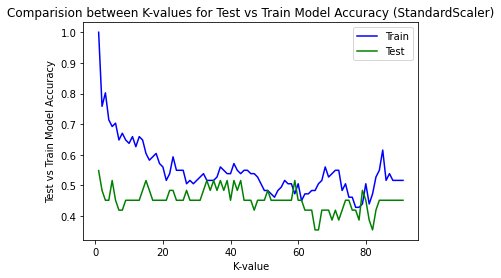

In [92]:
fig, ax = plt.subplots() #plot for Test vs Train Model Accuracy using StandardScaler

standard_k = np.array(value_of_k1)
train = np.array(train1)
test = np.array(test1)

plt.plot(standard_k, train1, 'b', label='Train')
plt.plot(standard_k, test1, 'g', label='Test')

plt.title('Comparision between K-values for Test vs Train Model Accuracy (StandardScaler)')

plt.xlabel('K-value')
plt.ylabel('Test vs Train Model Accuracy')
plt.legend()

# Task 3a

In [94]:
knn = KNeighborsClassifier(n_neighbors=12) #finding the accuracies for test and train at k value of 16
knn.fit(X_train, y_train)
y_test = le.transform(sy_test.to_numpy())
X_test = n1.transform(dfX_test.to_numpy())
print(knn.score(X_train,y_train),',',knn.score(X_test,y_test))

0.6153846153846154 , 0.3225806451612903


# Task 3b

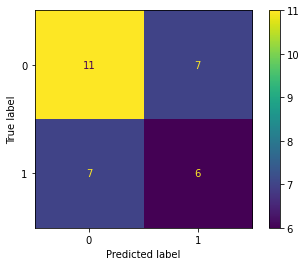

In [25]:
from sklearn.metrics import confusion_matrix #creation of confusion matrix
from sklearn.metrics import plot_confusion_matrix
knn = KNeighborsClassifier(n_neighbors=16)   #k value of 16 as chosen previously
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(knn, X_test, y_test)

# Task 4

In [26]:
ManUnited = np.array([[5.75,78,37]]) #data in array is soccer stats for Man United in 2010/11 season
X_ManUnited = n1.transform(ManUnited)
X_ManUnited

array([[0.15833333, 0.4691358 , 0.48717949]])

In [27]:
knn.predict(X_ManUnited)

array([0])

In [28]:
le.inverse_transform(knn.predict(X_ManUnited))

array(['Barca'], dtype=object)